In [4]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import numpy as np

In [5]:
fname = "C:/Users/Katie/Documents/GitHub/229project/CALosAngeles1939.geojson"
fname2 = "C:/Users/Katie/Documents/GitHub/229project/final_frame.csv"

In [6]:
fname3

'C:/Users/Katie/Documents/GitHub/229project/aqgdf.csv'

In [7]:
holc = gpd.read_file(fname)
sensors = gpd.read_file(fname2)

In [8]:
print(type(holc))
print(type(sensors))

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geodataframe.GeoDataFrame'>


In [15]:
holc.head()

,name,holc_id,holc_grade,area_description_data,geometry
0,None,A1,A,"{'0': 'Los Angeles County', '2': '85 15', '3':...","MULTIPOLYGON (((-118.45744 34.15201, -118.4478..."
1,None,A10,A,"{'0': 'Los Angeles County', '2': '90 10', '3':...","MULTIPOLYGON (((-118.11151 34.18311, -118.1094..."
2,None,A11,A,"{'0': 'Los Angeles County', '2': '85 5', '3': ...","MULTIPOLYGON (((-118.11300 34.15985, -118.1130..."
3,None,A12,A,"{'0': 'Los Angeles County', '2': '95 ', '3': '...","MULTIPOLYGON (((-118.17123 34.12776, -118.1708..."
4,None,A13,A,"{'0': 'Los Angeles County', '2': '60 35', '3':...","MULTIPOLYGON (((-118.17458 34.14194, -118.1735..."


In [10]:
sensors.head()

,field_1,created_at,filename,lat,long,PM2.5 ATM Mean,PM2.5 CF1 Mean,geometry
0,0,2019-03-16 00:00:00 UTC,CCA 61st and King (outside) (33.98329 -118.183...,33.98329,-118.183926,16.995496183206104,18.17295801526718,None
1,1,2019-03-16 00:00:00 UTC,CCA 52nd Dr and Heliotrope (outside) (33.98995...,33.98995,-118.178093,16.32888246628132,17.597437379576103,None
2,2,2019-03-26 00:00:00 UTC,Adams Square (inside) (inside) (34.133594 -118...,34.133594,-118.241213,12.812236842105255,14.105855263157892,None
3,3,2019-03-27 00:00:00 UTC,CSUN Live Oak (outside) (34.238179 -118.528333...,34.238179,-118.528333,13.484825581395349,13.641279069767442,None
4,4,2019-01-09 00:00:00 UTC,6th St (inside) (34.020076 -118.49534) Primary...,34.020076,-118.49534,6.793395348837209,7.069488372093021,None


In [11]:
sensors = gpd.GeoDataFrame(
    sensors, geometry=gpd.points_from_xy(sensors.long, sensors.lat, crs='EPSG:4326'))

In [12]:
sensors.head()

,field_1,created_at,filename,lat,long,PM2.5 ATM Mean,PM2.5 CF1 Mean,geometry
0,0,2019-03-16 00:00:00 UTC,CCA 61st and King (outside) (33.98329 -118.183...,33.98329,-118.183926,16.995496183206104,18.17295801526718,POINT (-118.18393 33.98329)
1,1,2019-03-16 00:00:00 UTC,CCA 52nd Dr and Heliotrope (outside) (33.98995...,33.98995,-118.178093,16.32888246628132,17.597437379576103,POINT (-118.17809 33.98995)
2,2,2019-03-26 00:00:00 UTC,Adams Square (inside) (inside) (34.133594 -118...,34.133594,-118.241213,12.812236842105255,14.105855263157892,POINT (-118.24121 34.13359)
3,3,2019-03-27 00:00:00 UTC,CSUN Live Oak (outside) (34.238179 -118.528333...,34.238179,-118.528333,13.484825581395349,13.641279069767442,POINT (-118.52833 34.23818)
4,4,2019-01-09 00:00:00 UTC,6th St (inside) (34.020076 -118.49534) Primary...,34.020076,-118.49534,6.793395348837209,7.069488372093021,POINT (-118.49534 34.02008)


KeyboardInterrupt: 

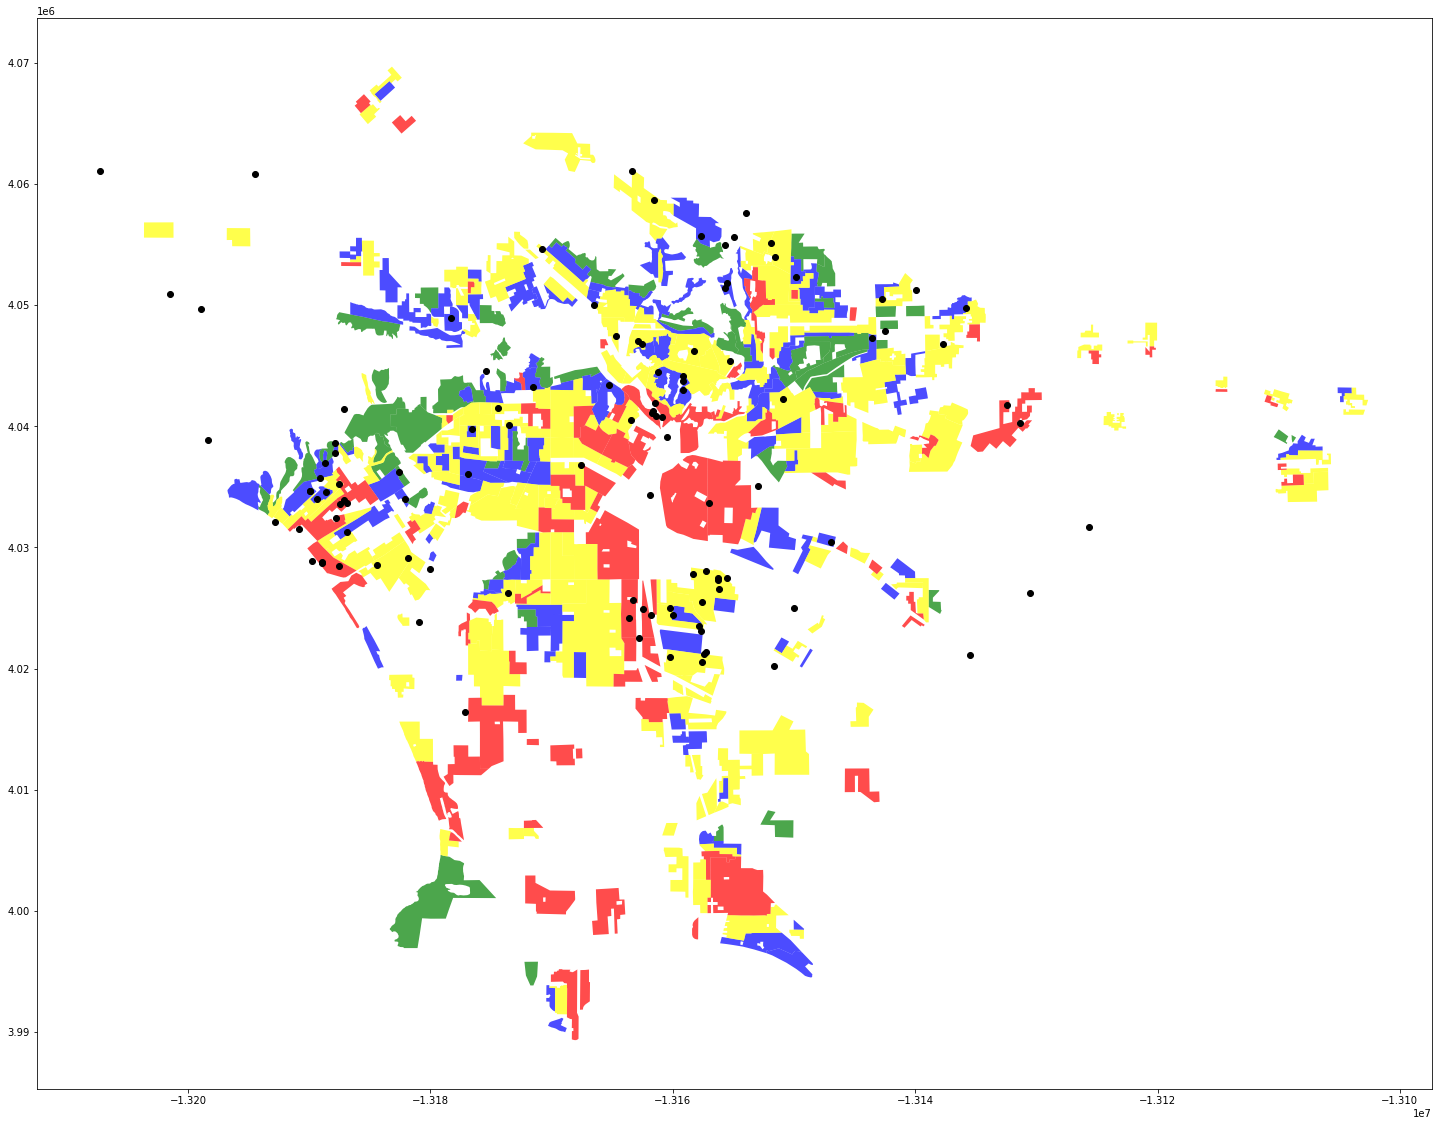

In [13]:
fig, ax = plt.subplots(1,1, figsize=(25,25))
color_mapping = {"A": "green", "B": "blue", "C":"yellow","D":"red"}
holc.to_crs('EPSG:3857').plot(color=holc["holc_grade"].map(color_mapping),legend = True, ax=ax, alpha= 0.7)
sensors.to_crs('EPSG:3857').plot(ax=ax, color='black',legend=True)

ctx.add_basemap(ax, zoom = 12, source = ctx.providers.Stamen.TonerLite)

ax.set_xticks([])
ax.set_yticks([])

ax.set(title='HOLC Neighborhood Grades and Air Quality Station Locations') 

In [ ]:
joindf = gpd.sjoin(sensors.to_crs('EPSG:4326'), holc.to_crs('EPSG:4326'), how="left", op='intersects')

In [ ]:
joindf.holc_grade = joindf.holc_grade.fillna(value="NA")

In [3]:
joindf.head()

NameError: name 'joindf' is not defined

In [15]:
#len(sensors.index)
#len(holc.index)
len(joindf.index)

110

In [16]:
joindf['PM2.5 CF1 Mean'] = joindf['PM2.5 CF1 Mean'].astype('float')

<AxesSubplot:title={'center':'PM2.5 CF1 Mean'}, xlabel='holc_grade'>

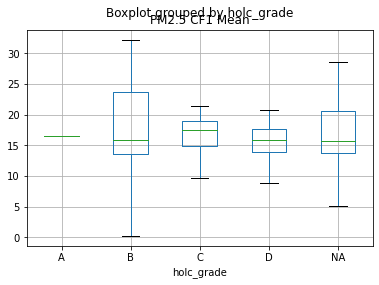

In [17]:
joindf.boxplot('PM2.5 CF1 Mean', by = 'holc_grade', showfliers = False)

In [18]:
joindf.groupby('holc_grade').count()

,field_1,created_at,filename,lat,long,PM2.5 ATM Mean,PM2.5 CF1 Mean,geometry,index_right,name,holc_id,area_description_data
holc_grade,,,,,,,,,,,,
A,1,1,1,1,1,1,1,1,1,0,1,1
B,25,25,25,25,25,25,25,25,25,0,25,25
C,30,30,30,30,30,30,30,30,30,0,30,30
D,15,15,15,15,15,15,15,15,15,0,15,15
NA,39,39,39,39,39,39,39,39,0,0,0,0
